In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
data = pd.read_csv('../datasets/kaggle/diamonds.csv')

In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
data.shape

(53940, 10)

In [7]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
np.unique(data['clarity'], return_counts=True)

In [8]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


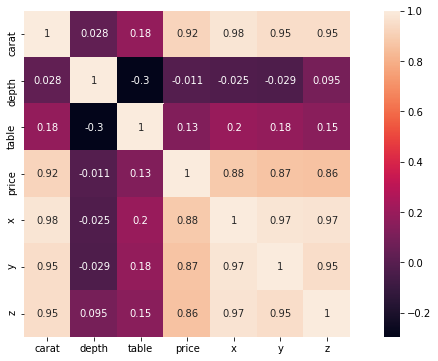

In [9]:
corr = data.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, square=True, annot=True)

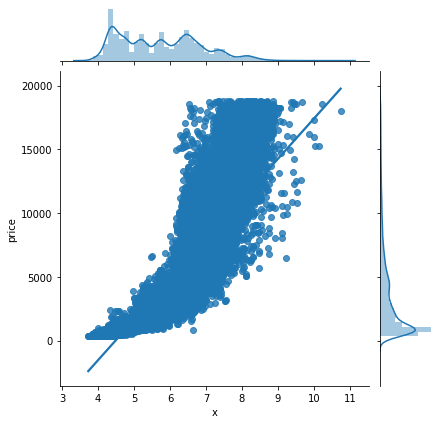

In [24]:
sns.jointplot(x=data['x'], y=data['price'], kind='reg')

In [17]:
data.drop(data[(data['z']>30)].index, inplace=True)

In [21]:
data.describe(include=['object']).columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [25]:
np.unique(data['color'], return_counts=True)

(array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array([ 6774,  9795,  9538, 11284,  8297,  5421,  2808], dtype=int64))

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [27]:
lb = LabelEncoder()
data['cut'] = lb.fit_transform(data['cut'])
data['color'] = lb.fit_transform(data['color'])
data['clarity'] = lb.fit_transform(data['clarity'])

In [28]:
X, y = data.drop(['price'], axis=1), data['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
model.score(X_test, y_test)

0.8906410654594276

In [ ]:
# Sab ke saath 0.8857
#after some bullshit 0.897

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
m2 = RandomForestRegressor()

In [37]:
m2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
m2.score(X_test, y_test)

0.9821136446569544

In [41]:
from sklearn.model_selection import cross_val_score

In [50]:
scores = cross_val_score(m2, X_train, y_train, cv=5)

In [51]:
scores

array([0.98055543, 0.97886338, 0.97892007, 0.98087467, 0.97957403])

In [54]:
np.round(np.mean(scores),4)

0.9798